In [191]:
import pandas as pd

#Reading raw data
data = pd.read_csv('sql_hc_dataset.csv')
display(data)

,RESOLUTION,PRODUCT,SEVERITY,UPDATED_TIMESTAMP,PLATFORM,RESOLVED_TIMESTAMP,GROUP_NAMES,CREATED_TIMESTAMP,COE_NAMES,EUI_OR_SIB,RESOLUTION_TIME,HOUR_TO_COMPLETION,ON_TIME
0,Fixed,NaN,P3,35:09.0,NaN,46:40.0,CR - Docs Core,53:20.0,Construction Records,NaN,360.0,864.0,False
1,Fixed,NaN,P3,35:09.0,NaN,46:40.0,CR - Docs Core,53:20.0,Construction Records,NaN,360.0,864.0,False
2,Fixed,NaN,P3,35:09.0,NaN,46:40.0,CR - Docs Core,53:20.0,Construction Records,NaN,360.0,864.0,False
3,Fixed,NaN,P3,35:09.0,NaN,46:40.0,CR - Docs Core,53:20.0,Construction Records,NaN,360.0,864.0,False
4,Fixed,NaN,P3,35:09.0,NaN,46:40.0,CR - Docs Core,53:20.0,Construction Records,NaN,360.0,864.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42487,Fixed,NaN,P3,58:20.0,NaN,39:36.0,CR - Docs Core,54:45.0,Construction Records,NaN,360.0,168.0,True
42488,Fixed,NaN,P3,58:20.0,NaN,39:36.0,CR - Docs Core,54:45.0,Construction Records,NaN,360.0,168.0,True
42489,Fixed,NaN,P3,58:20.0,NaN,39:36.0,CR - Docs Core,54:45.0,Construction Records,NaN,360.0,168.0,True
42490,Fixed,NaN,P3,58:20.0,NaN,39:36.0,CR - Docs Core,54:45.0,Construction Records,NaN,360.0,168.0,True


In [192]:
#Extracting only EUIs
EUI_only =  data['EUI_OR_SIB']=='EUI'
data_EUI = data[EUI_only]

#Extracting relevant variables
data_analy = data_EUI[["SEVERITY", "GROUP_NAMES","COE_NAMES","RESOLUTION_TIME","HOUR_TO_COMPLETION","ON_TIME"]]
data_analy.describe(include='all')


,SEVERITY,GROUP_NAMES,COE_NAMES,RESOLUTION_TIME,HOUR_TO_COMPLETION,ON_TIME
count,7059,6581,6952,7059.000000,6801.000000,7059
unique,3,25,12,NaN,NaN,2
top,P2,FC - Field Forms,Field Collaboration,NaN,NaN,False
freq,4292,1071,1354,NaN,NaN,4371
mean,NaN,NaN,NaN,175.161921,410.535068,NaN
std,NaN,NaN,NaN,140.403520,888.145859,NaN
min,NaN,NaN,NaN,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,72.000000,96.000000,NaN
50%,NaN,NaN,NaN,72.000000,192.000000,NaN
75%,NaN,NaN,NaN,360.000000,432.000000,NaN


In [205]:
#Transforming severity levels into numbers for further calculation
severity_nums = {"SEVERITY":     {"P1": 1, "P2": 2, "P3" :3 }}
data_analy = data_analy.replace(severity_nums)

##Calculating Health Score - Dividing the time required for completion by the actual time took for completion and
#Multiplying it with Severity values. The higher the score - the better the treatment
data_analy['HOUR_TO_COMPLETION'] = data_analy['HOUR_TO_COMPLETION'].replace(0,1) #Replacing zero with one so to avoid inf values
data_analy['Health Score'] = (data_analy['RESOLUTION_TIME']/data_analy['HOUR_TO_COMPLETION'])*data_analy['SEVERITY']
data_analy.head(10)

,SEVERITY,GROUP_NAMES,COE_NAMES,RESOLUTION_TIME,HOUR_TO_COMPLETION,ON_TIME,Health Score
91,2,CR - Docs Core,Construction Records,72.0,360.0,False,0.400000
92,2,CR - Docs Core,Construction Records,72.0,360.0,False,0.400000
174,3,CR - Docs Core,Construction Records,360.0,576.0,False,1.875000
175,3,CR - Docs Core,Construction Records,360.0,576.0,False,1.875000
176,3,CR - Docs Core,Construction Records,360.0,576.0,False,1.875000
177,3,CR - Docs Core,Construction Records,360.0,576.0,False,1.875000
178,3,CR - Docs Core,Construction Records,360.0,576.0,False,1.875000
179,3,CR - Docs Core,Construction Records,360.0,576.0,False,1.875000
180,3,CR - Docs Core,Construction Records,360.0,576.0,False,1.875000
334,2,FR - Admin,Frameworks,72.0,264.0,False,0.545455


(array([6067.,  163.,    0.,   71.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([  0.,  14.,  28.,  42.,  56.,  70.,  84.,  98., 112., 126., 140.,
        154., 168., 182., 196., 210., 224., 238., 252., 266., 280., 294.,
        308., 322., 336., 350.]),
 <BarContainer object of 25 artists>)

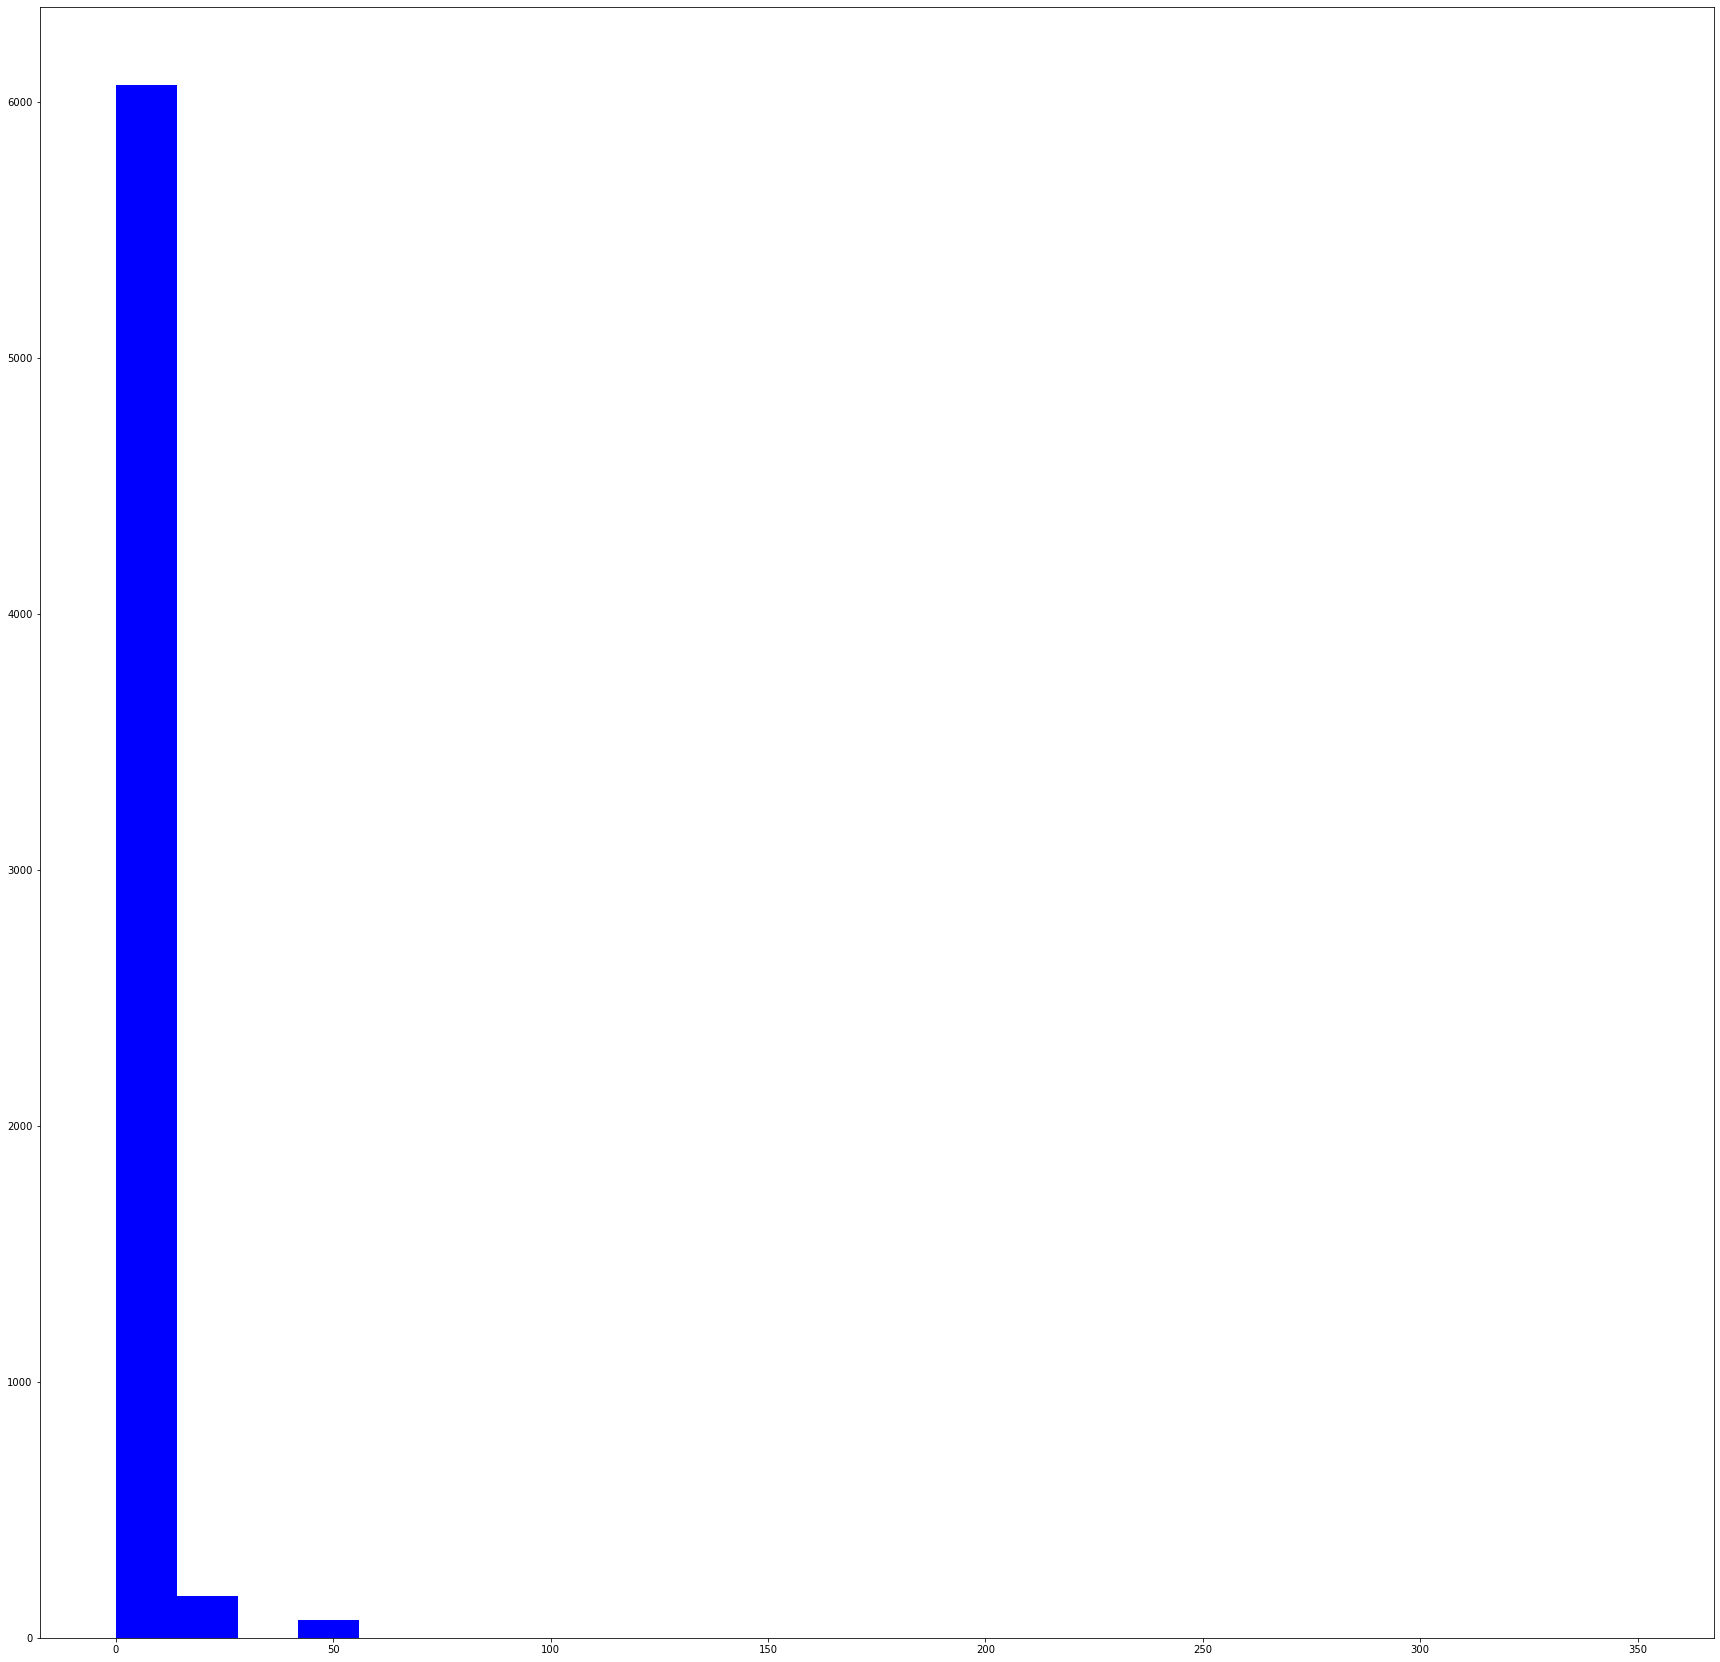

In [206]:

import matplotlib.pyplot as plt
#Histogram plot of the different Health Score values
plt.hist(data_analy['Health Score'], 25, range=[0, 350],facecolor='blue', align='mid')


(array([1458., 2768., 1259.,  512.,  159.,   74.,    0.,    0.,   71.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. ]),
 <BarContainer object of 25 artists>)

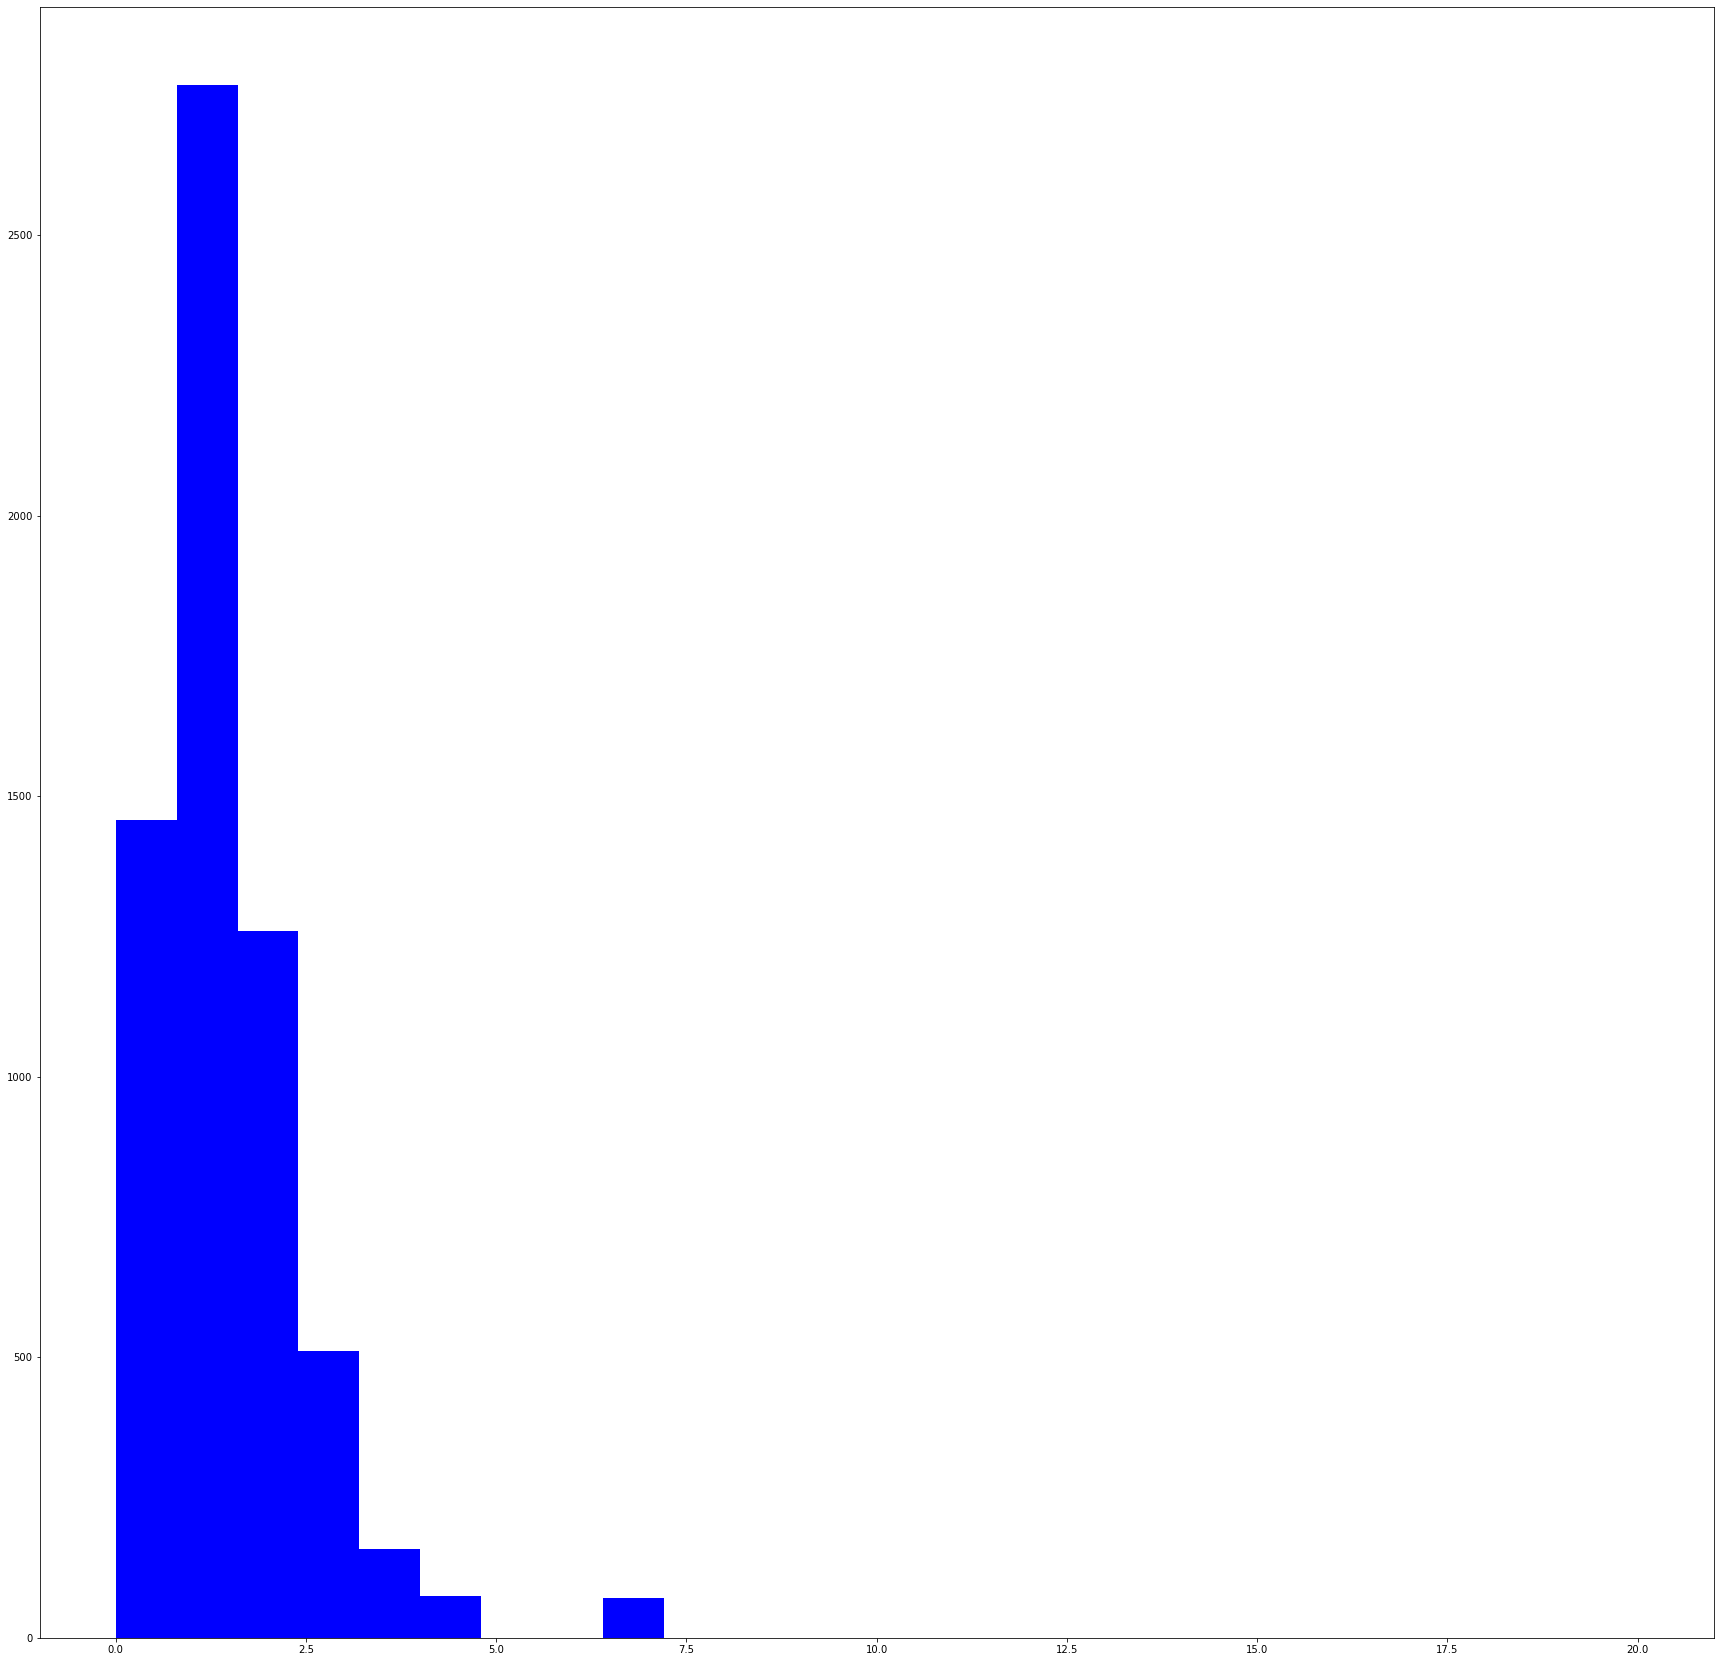

In [207]:
##Seems like there is a wide range between the lowest and the higest score. Lets take the square root from the variable
#Values and work with it
new_HS=data_analy['Health Score']**(1/2)
plt.hist(new_HS, 25, range=[0, 20],facecolor='blue', align='mid') #Looks better

In [208]:
data_analy['Health Score']=new_HS

In [209]:
#Removing NA Values
data_analy = data_analy[data_analy['Health Score'].notna()]
data_analy = data_analy[data_analy['COE_NAMES'].notna()]
data_analy = data_analy[data_analy['GROUP_NAMES'].notna()]

In [210]:
#Using a loop to calculate each COE's median and MAD Health Score

COE_medians=[]
COE_MAD=[]

COE_names=data_analy['COE_NAMES'].unique()
for i in COE_names:
    x=data_analy.loc[data_analy['COE_NAMES'] == i]
    COE_medians.append(x['Health Score'].median())
    COE_MAD.append(x['Health Score'].mad())

COE_tot=pd.DataFrame(COE_names, columns=['COE_names'])
COE_tot['COE_medians']=COE_medians
COE_tot['COE_MAD']=COE_MAD

COE_tot #Here we can see each COE's median and MAD Health Score

,COE_names,COE_medians,COE_MAD
0,Construction Records,1.414214,0.864104
1,Frameworks,1.095445,1.343136
2,Work Breakdown & Planning,1.414214,0.997095
3,Bidding & Risk,1.732051,1.053833
4,Common Services,1.000000,0.831865
5,Field Collaboration,1.000000,0.640193
6,Lifecycle,1.414214,1.049568
7,Enterprise,1.414214,0.845362
8,Project Controls,1.422204,0.776660
9,BIM for Construction,1.414214,1.110011


In [211]:
#Using a loop to calculate each group's median and MAD Health Score

groups_medians=[]
groups_mads=[]
groups_names=data_analy['GROUP_NAMES'].unique()
for i in groups_names:
    x=data_analy.loc[data_analy['GROUP_NAMES'] == i]
    x
    groups_medians.append(x['Health Score'].median())
    groups_mads.append(x['Health Score'].mad())

groups_tot=pd.DataFrame(groups_names, columns=['groups_names'])
groups_tot['groups_medians']=groups_medians
groups_tot['groups_mads']=groups_mads

groups_tot #Here we can see each group's median and MAD Health Score

,groups_names,groups_medians,groups_mads
0,CR - Docs Core,1.414214,0.956526
1,FR - Admin,1.095445,1.391754
2,WBP - Classic Products,1.224745,0.597335
3,BR - RiskNet,1.732051,0.376401
4,CS - Common Services,1.000000,0.835071
5,FC - Field Progress,1.000000,0.953577
6,CR - Record Consumption,1.267731,0.852812
7,LM - Project Lifecycle,0.866025,0.402161
8,CR - Docs Workflows,1.732051,0.623875
9,CS - Data Delivery,1.414214,0.826797
